In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import random

In [38]:
df = pd.read_csv('topic3', error_bad_lines=False);
print(df['tokenized'])
q=df['tokenized'].iloc[0:30000]
tfidf = TfidfVectorizer().fit_transform(q)
pairwise_similarity = tfidf * tfidf.T



0         ['aba', 'decid', 'commun', 'broadcast', 'licenc']
1         ['thousand', 'rememb', 'st', 'anniversari', 'd...
2            ['taipan', 'place', 'futur', 'public', 'hand']
3         ['report', 'highlight', 'contain', 'termin', '...
4              ['rain', 'eas', 'wheatbelt', 'water', 'woe']
                                ...                        
119832          ['firefight', 'resort', 'saltwat', 'tackl']
119833    ['north', 'west', 'victoria', 'record', 'low',...
119834       ['fire', 'engulf', 'hous', 'tracey', 'corbin']
119835    ['victoria', 'bushfir', 'mallacoota', 'resid',...
119836    ['vision', 'flame', 'approach', 'corryong', 'v...
Name: tokenized, Length: 119837, dtype: object


In [39]:
'''
print(type(pairwise_similarity))

print(pairwise_similarity)
print(pairwise_similarity[0,:].data)
print("Hello")
print(pairwise_similarity[0,:].indices)
print("Hello")
print(pairwise_similarity[0,:].indptr)

'''

'\nprint(type(pairwise_similarity))\n\nprint(pairwise_similarity)\nprint(pairwise_similarity[0,:].data)\nprint("Hello")\nprint(pairwise_similarity[0,:].indices)\nprint("Hello")\nprint(pairwise_similarity[0,:].indptr)\n\n'

       publish_date                                     headline_text     Doc  \
29870      20070622  wa premier fires broadside at howards indigenous  312563   

          Score  Topic                                          tokenized  
29870  0.383575      3  ['wa', 'premier', 'fire', 'broadsid', 'howard'...  


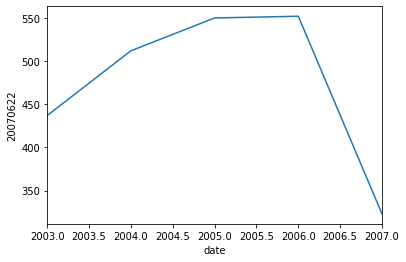

       publish_date                              headline_text     Doc  \
28058      20070322  water authority looks to help drought hit  293429   

          Score  Topic                                          tokenized  
28058  0.530311      3  ['water', 'author', 'look', 'help', 'drought',...  


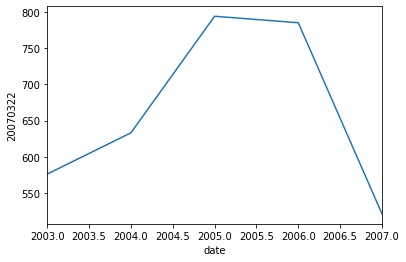

     publish_date                                      headline_text   Doc  \
353      20030307  community doubts insurers have financial viabi...  3465   

        Score  Topic                                          tokenized  
353  0.350468      3  ['commun', 'doubt', 'insur', 'financi', 'viabil']  


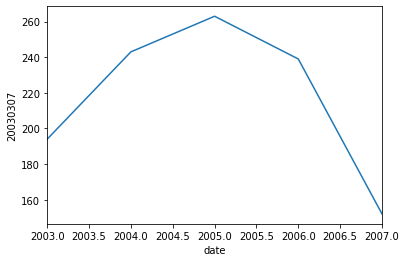

      publish_date             headline_text    Doc     Score  Topic  \
4492      20031026  storm clean up continues  51264  0.774976      3   

                          tokenized  
4492  ['storm', 'clean', 'continu']  


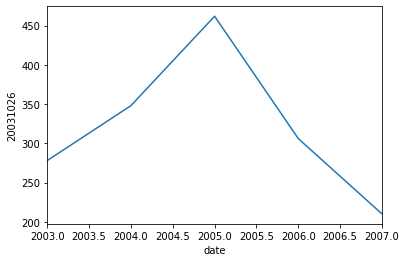

       publish_date                                 headline_text     Doc  \
15112      20050510  restructuring plans continue at murrumbidgee  162473   

          Score  Topic                                         tokenized  
15112  0.619821      3  ['restructur', 'plan', 'continu', 'murrumbidge']  


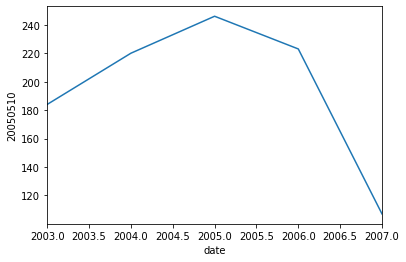

      publish_date               headline_text     Doc    Score  Topic  \
9682      20040809  govt boosts cancer funding  107907  0.58616      3   

                                tokenized  
9682  ['govt', 'boost', 'cancer', 'fund']  


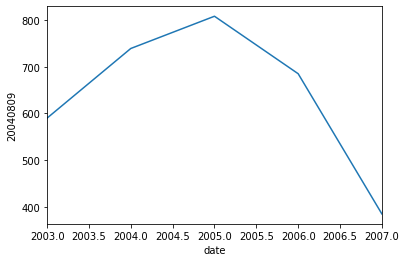

     publish_date                           headline_text    Doc     Score  \
927      20030410  territory reviews electoral commission  10620  0.819983   

     Topic                                      tokenized  
927      3  ['territori', 'review', 'elector', 'commiss']  


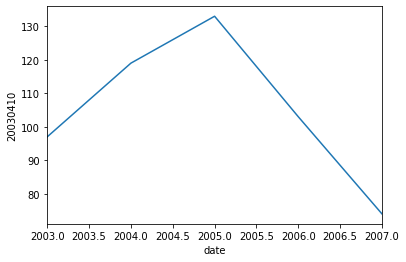

       publish_date                         headline_text     Doc     Score  \
21555      20060330  curtain to close on longreach cinema  227524  0.339687   

       Topic                                    tokenized  
21555      3  ['curtain', 'close', 'longreach', 'cinema']  


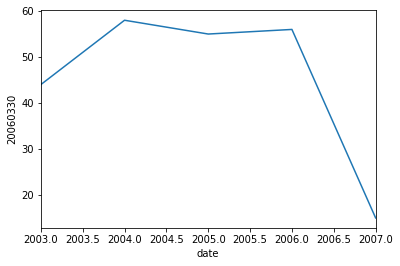

       publish_date                                   headline_text     Doc  \
13216      20050202  statistics highlight high indigenous sids rate  143202   

          Score  Topic                                          tokenized  
13216  0.301469      3  ['statist', 'highlight', 'high', 'indigen', 's...  


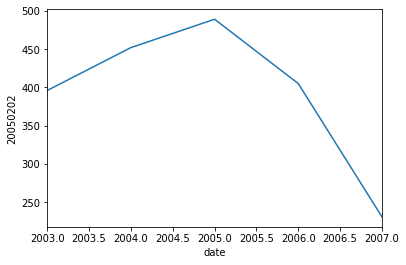

       publish_date                            headline_text     Doc  \
15205      20050513  police crime commission focus on bikies  163174   

          Score  Topic                                      tokenized  
15205  0.602628      3  ['polic', 'crime', 'commiss', 'focu', 'biki']  


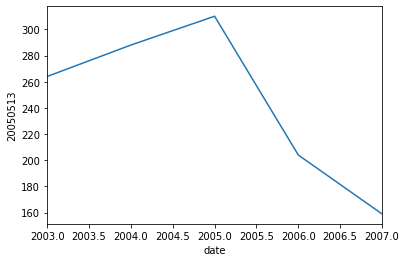

In [47]:
doc1=0
for p in range (0,10):
    #print(pairwise_similarity[i,:].indptr)
    i=random.randint(0,30000)
    arr=pairwise_similarity[i,:].indices
    data_arr=pairwise_similarity[i,:].data
    date_arr=[]

    #print(data_arr)
    doc1=df.loc[df.index==i]
    #print(doc1['publish_date'])
    #print(doc1['Doc'])
    for j in arr:
        doc2=df.loc[df.index==j]
        #print(int(doc2['publish_date']))
        date_arr.append(int(doc2['publish_date']))
    df_date_sim=pd.DataFrame()
    df_date_sim['date']=date_arr
    df_date_sim['similarity']=data_arr
    #df_date_sim['indices']=arr
    df_date_sim=df_date_sim.sort_values(by='date')
    #print(df_date_sim)
    
    df_date_sim['date'] = pd.to_datetime(df_date_sim['date'], format="%Y%m%d")
    #print(df_date_sim)
    m=df_date_sim.loc[df_date_sim['similarity']==1]
    print(doc1)
    df_date_sim.groupby(df_date_sim.date.dt.year).count()['similarity'].plot()
    k=df_date_sim.groupby(df_date_sim.date.dt.year).count()['similarity']
    
    plt.ylabel(str(int(doc1['publish_date'])))
    plt.show()
    #print(k)

In [41]:
df_date_sim=pd.DataFrame()
df_date_sim['date']=date_arr
df_date_sim['similarity']=data_arr
#df_date_sim['indices']=arr
df_date_sim=df_date_sim.sort_values(by='date')
print(df_date_sim)


         date  similarity
12   20030219    0.253237
44   20030221    0.279903
774  20030223    0.078734
773  20030224    0.081516
43   20030225    0.232218
..        ...         ...
47   20070625    0.092824
776  20070626    0.182469
46   20070626    0.089913
775  20070627    0.152905
45   20070628    0.092463

[951 rows x 2 columns]


          date  similarity
479 2003-02-19    1.000000
287 2003-02-26    0.168038
446 2003-03-06    0.126280
286 2003-03-13    0.237038
478 2003-03-18    0.208901
..         ...         ...
2   2007-06-07    0.148038
289 2007-06-11    0.162472
1   2007-06-11    0.159733
0   2007-06-12    0.129458
288 2007-06-17    0.265435

[480 rows x 2 columns]
          date  similarity
479 2003-02-19         1.0


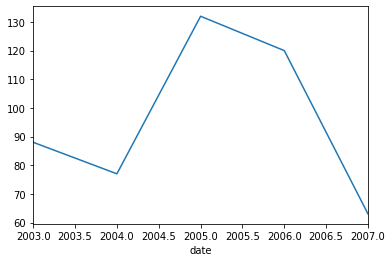

date
2003     88
2004     77
2005    132
2006    120
2007     63
Name: similarity, dtype: int64


In [30]:
df_date_sim['date'] = pd.to_datetime(df_date_sim['date'], format="%Y%m%d")
print(df_date_sim)
m=df_date_sim.loc[df_date_sim['similarity']==1]
print(m)
df_date_sim.groupby(df_date_sim.date.dt.year).count()['similarity'].plot()
k=df_date_sim.groupby(df_date_sim.date.dt.year).count()['similarity']
plt.show()
print(k)
#plt.bar(k,df_date_sim.date.dt.year)
#df_date_sim.plot()